<a href="https://colab.research.google.com/github/Katrill/PM2.5/blob/main/FIO_using_tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation Tesseract, cv2

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import pytesseract
import os
import cv2
import glob
%matplotlib inline 
from matplotlib import pyplot as plt 
# from PIL import Image
# import Image

In [3]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Add russian language to Tesseract
!sudo apt-get install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 1,272 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-rus all 4.00~git24-0e00fe6-1.2 [1,272 kB]
Fetched 1,272 kB in 0s (9,175 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling b

In [5]:
# If tesseract is not executable in the PATH, include the following
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [6]:
# dowload file
from google.colab import files
uploaded = files.upload()

Saving 0.jpeg to 0.jpeg
Saving 1.jpeg to 1.jpeg
Saving 2.jpeg to 2.jpeg
Saving 3.jpeg to 3.jpeg
Saving 4.png to 4.png
Saving 5.jpeg to 5.jpeg
Saving 6.jpeg to 6.jpeg
Saving 7.jpeg to 7.jpeg
Saving 8.jpeg to 8.jpeg
Saving 9.jpeg to 9.jpeg


In [ ]:
import glob
import os
path = "/content/*.*"
for file in glob.glob(path):
   print(os.path.basename(file))

6.jpeg
2.jpeg
8.jpeg
3.jpeg
1.jpeg
4.png
7.jpeg
0.jpeg
5.jpeg
9.jpeg


# выделение текста на фотографии

Обработка фотографий по отдельности, выделение нужного текста по его расположению на снимке.

In [52]:
import glob
path = "/content/*.*"
for file in glob.glob(path):
   print(os.path.basename(file))

6.jpeg
2.jpeg
8.jpeg
3.jpeg
1.jpeg
4.png
7.jpeg
0.jpeg
5.jpeg
9.jpeg


image.shape (800, 555, 3)


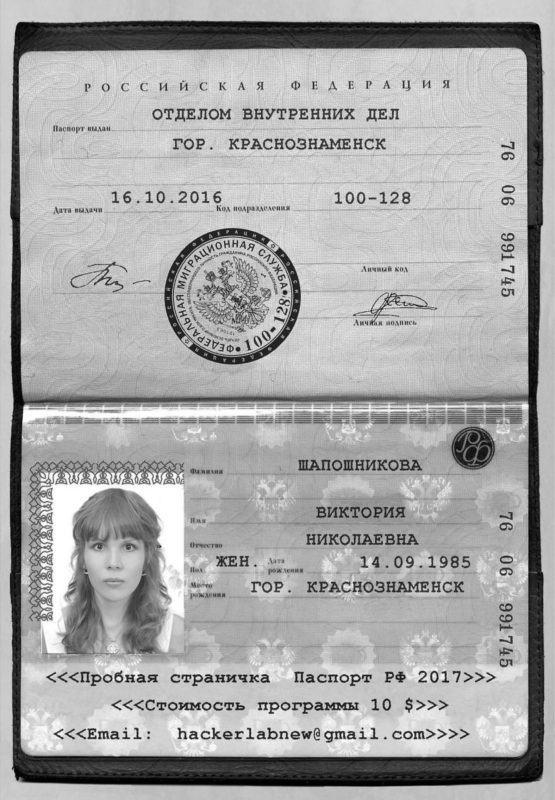

In [123]:
# чтение имиджа и перевод его цветовой палитры в градации серого
from google.colab.patches import cv2_imshow

image = cv2.imread("2.jpeg")
print('image.shape', image.shape)
height, width, _ = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

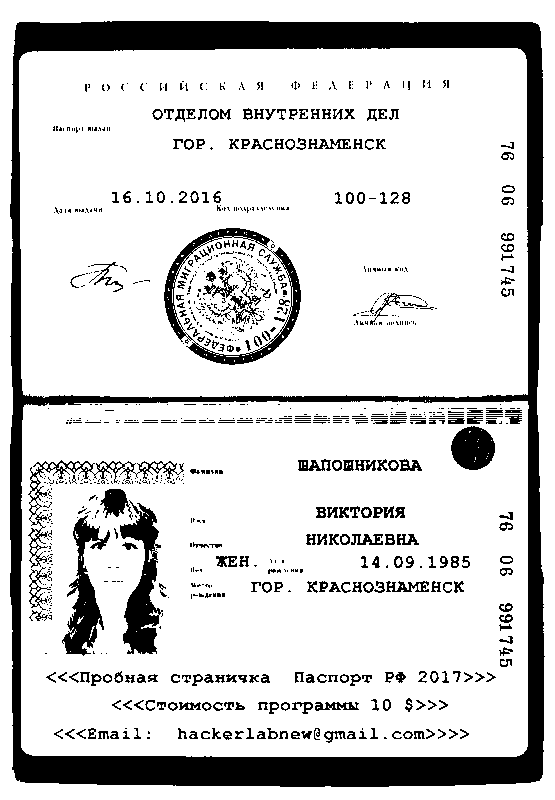

In [124]:
# черно-белая палитра
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

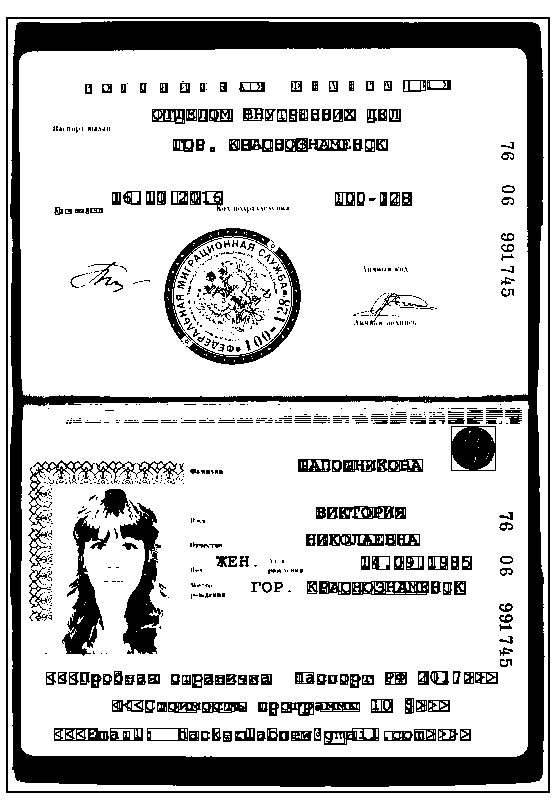

In [23]:
# Расположение букв
boxes = pytesseract.image_to_boxes(thresh, lang="eng+rus", config='--psm 3')
for box in boxes.splitlines():
   box = box.split(" ")
   thresh = cv2.rectangle(thresh, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 0, 255), 1)
cv2_imshow(thresh)

In [31]:
d = pytesseract.image_to_data(cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1], lang="rus", config='--psm 3')
lines = d.splitlines()
n = 0
for i in range(1, len(lines)):
    while n != 3:
        if len(lines[i].split()) == 12 and int(lines[i].split()[7]) > 0.5*height:
            n += 1
            print(lines[i].split()[-1])
        break

ШАПОШНИКОВА
9
ВИКТОРИЯ


In [77]:
def FIO(image):
  # выделение ФИО на имидже
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]
  res = pytesseract.image_to_data(thresh, lang="rus", config='--psm 3')
  lines = res.splitlines()
  n = 0
  for i in range(1, len(lines)):
    while n != 3:
        if len(lines[i].split()) == 12 and (int(lines[i].split()[7]) > 0.5*height):
            n += 1
            print(lines[i].split()[-1])
        break
  print("___________________")
  print()

In [78]:
import glob
import os

path = "/content/*.*"
for file in glob.glob(path):
  f = cv2.imread(os.path.basename(file))
  FIO(f)

___________________

ШАПОШНИКОВА
9
ВИКТОРИЯ
___________________

11
132760
>
___________________

РАЙОНЕ
ГОРОДА
ТОЛЬЯТТИ
___________________

ХАЛАБУДИНА.
юлия
АЛЕКСЕЕВНА
___________________

___________________

линия
ИМЯРЕК
_
___________________

джон
14.06.1946
ГОР.
___________________

___________________

УГАНЗАЛЕ
оч
И
___________________



# Выделение текста на фотографии по расположению лица.

In [79]:
import glob
path = "/content/*.*"
for file in glob.glob(path):
   print(os.path.basename(file))

6.jpeg
2.jpeg
8.jpeg
3.jpeg
1.jpeg
4.png
7.jpeg
0.jpeg
5.jpeg
9.jpeg


In [117]:
def face(image):
  # face detection and finding text
  # test_image = cv2.imread(image)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 
    scaleFactor= 1.1,
    minNeighbors= 5,
    minSize=(10, 10))
  for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
     xc, yc, width, height = x, y, x+w, y+h
  #plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
  d = pytesseract.image_to_data(gray, lang="rus", config='--psm 3')
  lines = d.splitlines()
  for i in range(1, len(lines)):
    if len(lines[i].split()) == 12:
      if int(lines[i].split()[6]) > (xc + 1.0*width):
        if (yc + 0.05*height) > int(lines[i].split()[7]) > (yc - 0.6*height):
          print(lines[i].split()[-1])
  print("___________________")
  print()

In [120]:
face(cv2.imread("1.jpeg"))

123
-
005
ХАЛАБУДИНА.
юлия
АЛЕКСЕЕВНА
90
___________________



In [118]:
path = "/content/*.*"
for file in glob.glob(path):
  f = cv2.imread(os.path.basename(file))
  face(f)

ды
712-104
ВАСЛЕВСКИЙ
ГРИГОРИЙ.
ПЕТРОВИЧ
___________________

100-128
ШАПОШНИКОВА
®
ВИКТОРИЯ
НИКОЛАЕВНА.
___________________

ТЕ
13
ИЕ
300401
8
кнохоназь
о
нак
И
чая
мона
ной
513802
‘имид
Вос.
02
да
иувиихомазы
‘иона
вмоИ
$2
Уалих
ам
Ш
180-008
КУЗЕВАНОВ
ИГОРЕВИЧ
___________________

ГОРОДА
ТОЛЬЯТТИ
к»,
„иаризлеления
112-009
Личный
код
АЛЕКСЕЕВИЧ
___________________

123
-
005
ХАЛАБУДИНА.
юлия
АЛЕКСЕЕВНА
90
___________________

ПЕТЕРБУРГА.
___________________

„,
292—000.
000000
ИМЯРЕК
—
ЕВГЕНИЙ
=
АЛЕКСАНДРОВИЧ
___________________

иыь-—
7722112
ТРАМП
ДОНАЛЬД
джон
___________________

„,,..
600-022
Личный
кох
51808т
УТ
___________________

ОБ.
1
Р-НЕ
РИНЕ
г
=
—
АНАТОЛЬЕВНА
___________________



Для лучшего выделения текста необходимо прдварительное кадрирование снимка, что позволит выделить нужную  область. 